## IST652 SCRIPTING FOR DATA ANALYSIS - Project
             WHO: Ray Marquez | WHEN: 03-JUN-2020 | PROFESSOR: Debbie Landowski
       
### OBJECTIVE

### DATA SOURCES
    1. KAGGLE - COVID cases and deaths at the state level
    2. KAGGLE - COVID cases and deaths at the County level
    3. NOAA - Weather (surface) Temperatures for 2020 Q1 (during pandemic Q1)

### PROCESS OVERVIEW



In [1]:
# IMPORT  FILES
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
print (csv.list_dialects())

['excel', 'excel-tab', 'unix']


### READ DATA SETS
     1. COVID 19 STATE LEVEL
     2. COVID 19 COUNTY LEVEL 
     3. Weather Temperature datasets
         a. State Abbreviations and Names
         b. Stations
         
     
     

##### . . . . . . . . . . READING THE   COVID-19 CASES : AT STATE LEVEL

In [2]:
inStateList = []
inStateListD = []
inStateFile = 'covid-19-state-level-data.csv'

with open (inStateFile,'r') as csvfile:
    inStateRdr = csv.reader(csvfile, dialect='excel',delimiter=',')
    
    for line in inStateRdr:
        if line [0].startswith ('date'):
            continue
        else:
            try:
                inState = {}
                inState ['date'] = line [0]
                inState ['state'] = line [1]
                inState ['fips'] = line [2]
                inState ['cases'] = int(line [3])
                inState ['deaths'] = int(line [4])
                
                inStateList.append(line[0:])
                inStateListD.append(inState)  
                
            except IndexError:
                print ('index error: ', line)

csvfile.close()
print ('>>> Total Number of State Rows : {:,d}'.format(len(inStateList)))
                
        

>>> Total Number of State Rows : 3,094


##### . . . . . . . . . . READING THE   COVID-19 CASES : AT COUNTY LEVEL

In [3]:
inCountyList = []
inCountyListD = []
inCountyFile = 'covid-19-county-level-data.csv'

with open (inCountyFile,'r') as csvfile:
    inCountyRdr = csv.reader(csvfile, dialect='excel',delimiter=',')
    
    for line in inCountyRdr:
        if line [0].startswith ('date'):
            continue
        else:
            try:
                inCounty = {}
                inCounty ['date'] = line [0]
                inCounty ['county'] = line [1]
                inCounty ['state'] = line [2]
                inCounty ['fips'] = line [3]
                inCounty ['cases'] = int(line [4])
                inCounty ['deaths'] = int(line [5])
                
                inCountyList.append(line[0:])
                inCountyListD.append(inCounty)  
                
            except IndexError:
                print ('index error: ', line)

csvfile.close()
print ('>>> Total Number of County Rows : {:,d}'.format(len(inCountyList)))

>>> Total Number of County Rows : 95,420


##### . . . . . . . . . . READING THE WEATHER DATASET: State Names and Abbreviations

In [4]:
inStNameList = []
inStNameListD = []
inStNameFile = '01-ghcnd-states.txt'

with open (inStNameFile,'r') as csvfile:
    inStNameRdr = csv.reader(csvfile, dialect='excel',delimiter=' ')
    
    for line in inStNameRdr:
        if line [0].startswith ('date'):
            continue
        else:
            try:
                inStName = {}
                inStName ['st'] = line [0]
                inStName ['state'] = line [1]
                
                inStNameList.append(line[0:])
                inStNameListD.append(inStName)  
                
            except IndexError:
                print ('index error: ', line)

csvfile.close()
print ('>>> Total Number of State Name Rows : {:,d}'.format(len(inStNameList)))

>>> Total Number of State Name Rows : 74


##### . . . . . . . . . . READING THE WEATHER DATASET: STATIONS ID, LAT/LONG, ELEVATION

In [5]:
inStationList = []
inStationListD = []
inStationFile = '02-ghcnd-stations-v2.txt'
#readIdxErr = 0

with open (inStationFile,'r') as csvfile:
    inStationRdr = csv.reader(csvfile, dialect='excel',delimiter='\t')
    
    for line in inStationRdr:
        if line [0].startswith ('date'):
            continue
        else:
            try:
                inStation = {}

                inStation ['id'] = line [0]
                inStation ['lat'] = line [1]
                inStation ['long'] = line [2]
                inStation ['elev'] = line [3]
                inStation ['st'] = line [4]
                
                # -------------------------------------------------------------------------------------
                # The file came in with space or spaces as delimiter. Where there are more than one
                # space in between data points, data is not aligned when evaluating the resuling df.
                # This logic will parse through each line of the file and look for the first 4 data points
                # which covers the ID, Latitude, Longitude and Elevation.The rest of the data are more
                # inconsistently available and are not useful for the data analysis. It will be ignored
                
                #x = 0
                #i = 0
                #while x < 12 or i > 4:
                #    if line[x] == "":
                #        x += 1
                #        continue
                #    else:
                #        if line[x] == " ":
                #            x += 1
                #            continue
                #        else:
                #            inStation [i] = line [x]
                #            x += 1
                #            i += 1
                            
                # -------------------------------------------------------------------------------------
                
                inStationList.append(line[0:])
                inStationListD.append(inStation)  
                
            except IndexError:
                print ('index error: ', line)
                #readIdxErr += 1
                #continue

csvfile.close()
print ('>>> Total Number of Station Rows : {:,d}'.format(len(inStationList)))

>>> Total Number of Station Rows : 115,082


##### . . . . . . . . . . READING THE WEATHER DATASET: AVERAGE TEMPERATURE READINGS

In [54]:
inTavgList = []
inTavgListD = []
inTavgFile = '04-ghcnd-tavg.csv'
#inTavgFile = 'data3.csv'

with open (inTavgFile,'r') as csvfile:
    inTavgRdr = csv.reader(csvfile, dialect='excel',delimiter=',')
    
    for line in inTavgRdr:
        if line [0].startswith ('id'):
            continue
        else:
            try:
                inTavg = {}
                #inField = (line[0],"'")
                #inTavg ['id'] = inField
                inTavg ['id'] = line [0]
                inTavg ['date'] = line [1]
                inTavg ['element'] = line [2]
                inTavg ['value'] = int(line [3])
                #inTavg ['mflag'] = line [4]
                #inTavg ['qflag'] = line [5]
                #inTavg ['sflag'] = line [6]             
                
                inTavgList.append(line[0:])
                inTavgListD.append(inTavg)  
                
            except IndexError:
                print ('index error: ', line)

csvfile.close()
print ('>>> Total Number of Average Temp Rows : {:,d}'.format(len(inTavgList)))

>>> Total Number of Average Temp Rows : 888,217


### EXPLORING THE STATE DATA

In [7]:
stDF = pd.DataFrame(inStateList)                        # turn the list into a data frame
stDF.columns=["date","state","fips","cases","deaths"]   # assign column names
stDF.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [8]:
stDF.describe()         # looking at the summary of each column

,date,state,fips,cases,deaths
count,3094,3094,3094,3094,3094
unique,98,55,55,1769,591
top,2020-03-30,Washington,53,1,0
freq,55,98,98,216,956


In [9]:
stDF.count()           # doing a count to confirm that nothing is missing

date      3094
state     3094
fips      3094
cases     3094
deaths    3094
dtype: int64

In [10]:
stateDF = pd.DataFrame(inStateListD)                    # turn list of dictionaries into a data frame
#stateDF = stateDF.set_index("date")                    # set an index
stateDF.head()

,cases,date,deaths,fips,state
0,1,2020-01-21,0,53,Washington
1,1,2020-01-22,0,53,Washington
2,1,2020-01-23,0,53,Washington
3,1,2020-01-24,0,17,Illinois
4,1,2020-01-24,0,53,Washington


In [11]:
stateDF.describe()                               # do summary of each column

,cases,deaths
count,3094.00000,3094.000000
mean,5648.32159,240.653846
std,21357.34818,1144.787845
min,1.00000,0.000000
25%,27.00000,0.000000
50%,485.50000,8.000000
75%,3017.75000,85.750000
max,292027.00000,17303.000000


In [12]:
stateDF.count()                  # check for missing data

cases     3094
date      3094
deaths    3094
fips      3094
state     3094
dtype: int64

In [13]:
# Evaluate date column
ALLminDT = min(stateDF['date'])
ALLmaxDT = max(stateDF['date'])

# Evaluate the state column
ALLState = set(stateDF['state'])        # get unique list of states
ALLState                                # this list reveals "states" that can be dropped
NUMState = len(ALLState)                # total count is 55. should be 50 max

print (' \n>>> total rows read for state file      - ', len(inStateList))
print (' \n>>> earliest date (for all states)      - ', ALLminDT)
print (' \n>>> latest date (for all states)        - ', ALLmaxDT)
print (' \n>>> number of available in the data set - ', NUMState, ' ***')


 
>>> total rows read for state file      -  3094
 
>>> earliest date (for all states)      -  2020-01-21
 
>>> latest date (for all states)        -  2020-04-27
 
>>> number of available in the data set -  55  ***


### EXPLORING THE COUNTY DATA

In [14]:
countyDF = pd.DataFrame(inCountyListD)                    # turn list of dictionaries into a data frame
#countyDF = countyDF.set_index("date")                    # set an index
countyDF.head()

,cases,county,date,deaths,fips,state
0,1,Snohomish,2020-01-21,0,53061,Washington
1,1,Snohomish,2020-01-22,0,53061,Washington
2,1,Snohomish,2020-01-23,0,53061,Washington
3,1,Cook,2020-01-24,0,17031,Illinois
4,1,Snohomish,2020-01-24,0,53061,Washington


In [15]:
countyDF.describe()

,cases,deaths
count,95420.000000,95420.000000
mean,183.165510,7.799382
std,2180.791781,140.176983
min,0.000000,0.000000
25%,3.000000,0.000000
50%,9.000000,0.000000
75%,38.000000,1.000000
max,160499.000000,11857.000000


In [16]:
countyDF.count()

cases     95420
county    95420
date      95420
deaths    95420
fips      95420
state     95420
dtype: int64

In [17]:
# Evaluate date column
ALLminDT = min(countyDF['date'])
ALLmaxDT = max(countyDF['date'])

# Evaluate the state column
ALLState = set(countyDF['state'])          # get unique list of states
ALLState                                   # this list reveals "states" that can be dropped
NUMState = len(ALLState)                   # total count is 55. should be 50 max

# Evaluate the county column
ALLCounty = set(countyDF['county'])        # get unique list of countys
ALLCounty                                  # this list reveals "countys" that can be dropped
NUMCounty = len(ALLCounty)               

print (' \n>>> total rows read for county file     - ', len(inCountyList))
print (' \n>>> earliest date (for all countys)     - ', ALLminDT)
print (' \n>>> latest date (for all countys)       - ', ALLmaxDT)
print (' \n>>> number of states in the data set    - ', NUMState, ' ***')
print (' \n>>> number of counties in the data set  - ', NUMCounty)

 
>>> total rows read for county file     -  95420
 
>>> earliest date (for all countys)     -  2020-01-21
 
>>> latest date (for all countys)       -  2020-04-27
 
>>> number of states in the data set    -  55  ***
 
>>> number of counties in the data set  -  1679


### EXPLORING STATE NAMES & ABBREVIATIONS FOR WEATHER FILES

In [18]:
inStNameDF = pd.DataFrame(inStNameListD)                    # turn list of dictionaries into a data frame
inStNameDF.head()

,st,state
0,AB,ALBERTA
1,AK,ALASKA
2,AL,ALABAMA
3,AR,ARKANSAS
4,AS,AMERICAN


In [19]:
inStNameDF.describe()

,st,state
count,74,74
unique,74,68
top,LA,NEW
freq,1,5


In [20]:
inStNameDF.count()

st       74
state    74
dtype: int64

In [21]:
# Evaluate the state column
ALLState = set(inStNameDF['state'])          # get unique list of states
ALLState                                   # this list reveals "states" that can be dropped
NUMState = len(ALLState)                   # total count is 55. should be 50 max         

print (' \n>>> total rows read for weather state names file - ', len(inStNameList))
print (' \n>>> number of states in the data set             - ', NUMState, '***')       

 
>>> total rows read for weather state names file -  74
 
>>> number of states in the data set             -  68 ***


### EXPLORING WEATHER STATIONS

In [22]:
inStationDF = pd.DataFrame(inStationListD)                    # turn list of dictionaries into a data frame
inStationDF.head()

,elev,id,lat,long,st
0,10.1,ACW00011604,17.1167,-61.7833,
1,19.2,ACW00011647,17.1333,-61.7833,
2,34,AE000041196,25.333,55.517,
3,10.4,AEM00041194,25.255,55.364,
4,26.8,AEM00041217,24.433,54.651,


In [23]:
inStationDF.describe()

,elev,id,lat,long,st
count,115082,115082,115082,115082,115082
unique,9439,115082,64928,73063,77
top,-999.9,USC00056203,49.2,145.3,
freq,4622,1,43,45,43977


In [24]:
inStationDF.count()

elev    115082
id      115082
lat     115082
long    115082
st      115082
dtype: int64

In [25]:
# Evaluate the state column
#ALLState = set(inStationDF['state'])          # get unique list of states
#ALLState                                   # this list reveals "states" that can be dropped
#NUMState = len(ALLState)                   # total count is 55. should be 50 max         

print (' \n>>> total rows read for weather stations file - ', len(inStationList))
#print (' \n>>> number of states in the data set             - ', NUMState, '***')    

 
>>> total rows read for weather stations file -  115082


### EXPLORING WEATHER TEMPERATURE READINGS FOR 2020

In [56]:
inTavgDF = pd.DataFrame(inTavgListD)                    # turn list of dictionaries into a data frame
inTavgDF.head()

,date,element,id,value
0,20200101,TAVG,USS0018D08S,23
1,20200101,TAVG,MXM00076423,92
2,20200101,TAVG,CA003034485,0
3,20200101,TAVG,USS0006K44S,-62
4,20200101,TAVG,USS0010E12S,-43


In [57]:
inTavgDF.describe()

,value
count,888217.000000
mean,62.174132
std,135.255080
min,-728.000000
25%,-15.000000
50%,57.000000
75%,151.000000
max,426.000000


In [58]:
inTavgDF.count()

date       888217
element    888217
id         888217
value      888217
dtype: int64

In [59]:
print (' \n>>> total rows read for daily temperature readings - ', len(inTavgList))

 
>>> total rows read for daily temperature readings -  888217


### SUMMARIZE / GROUP DATAFRAMES

In [30]:
stateDF.head()

,cases,date,deaths,fips,state
0,1,2020-01-21,0,53,Washington
1,1,2020-01-22,0,53,Washington
2,1,2020-01-23,0,53,Washington
3,1,2020-01-24,0,17,Illinois
4,1,2020-01-24,0,53,Washington


testDF = stateDF.groupby(['state'], as_index=False)
for key, values in testDF:
    print (testDF.get_group(key), "\n\n")

##### . . . . . . .  GROUP CASES AND DEATHS:  BY STATE

In [85]:
##stateDF_bySt = stateDF.iloc[0:10].groupby(['state'])
stateDF_bySt = stateDF.groupby(['state'], as_index=False)

##for key, values in stateDF_bySt:
##    print (stateDF_bySt.get_group(key), "\n\n")
    
CD_stateDF_bySt = stateDF_bySt.agg({'cases':'sum','deaths':'sum'})
#stateDF_bySt.aggregate(['sum'])

CD_stateDF_bySt.tail()

#CD_stateDF_bySt


,state,cases,deaths
50,Virginia,185754,5669
51,Washington,329527,16889
52,West Virginia,18843,396
53,Wisconsin,108452,4612
54,Wyoming,8136,61


for key, values in stateDF_bySt:
    print (stateDF_bySt.get_group(key), "\n\n")

##### . . . . . . .  GROUP CASES AND DEATHS:  BY DATE

In [86]:
stateDF_byDt = stateDF.groupby(['date'], as_index=False)
CD_stateDF_byDt = stateDF_byDt.agg({'cases':'sum','deaths':'sum'})
CD_stateDF_byDt.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


for key, values in stateDF_byDt:
    print (stateDF_byDt.get_group(key),"\n\n")

##### . . . . . . .  GROUP CASES AND DEATHS:  BY STATE and DATE

In [87]:
stateDF_bySt_byDt = stateDF.groupby(['state','date'], as_index=False)
CD_stateDF_bySt_byDt = stateDF_bySt_byDt.agg({'cases':'sum','deaths':'sum'})
CD_stateDF_bySt_byDt.head()


,state,date,cases,deaths
0,Alabama,2020-03-13,6,0
1,Alabama,2020-03-14,12,0
2,Alabama,2020-03-15,23,0
3,Alabama,2020-03-16,29,0
4,Alabama,2020-03-17,39,0


for key, values in stateDF_bySt_byDt:
    print (stateDF_bySt_byDt.get_group(key),"\n\n")

### PLOTTING 

In [90]:
c = np.array([CD_stateDF_bySt['cases']])
d = np.array([CD_stateDF_bySt['deaths']])
s = np.array([CD_stateDF_bySt['state']])
CD_stateDF_bySt[0:].head()

#x_axis = np.arrange(len(xPlot))

,state,cases,deaths
0,Alabama,110554,3309
1,Alaska,8028,159
2,Arizona,113731,4063
3,Arkansas,47925,866
4,California,775044,25381


In [91]:
stateDF.head()

,cases,date,deaths,fips,state
0,1,2020-01-21,0,53,Washington
1,1,2020-01-22,0,53,Washington
2,1,2020-01-23,0,53,Washington
3,1,2020-01-24,0,17,Illinois
4,1,2020-01-24,0,53,Washington


In [ ]:
#width = 0.75
#fig, ax= plt.subplots()
#rects1 = ax.bar(x_axis - width/2, c1, width, label='Cases')
#rects2 = ax.bar(x_axis + width/2, d1, width, label='Deaths')

#fig.tight_layout()
#plt.show()

Text(0, 0.5, 'cases')

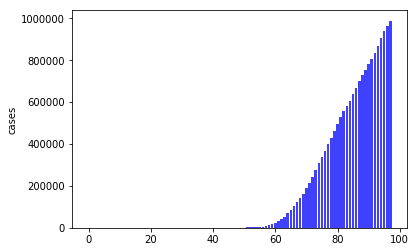

In [149]:
c1 = CD_stateDF_byDt['cases']
x_axis = np.arange(len(c1))

plt.bar(x_axis, c1, color='b', alpha=0.75, align="center")
plt.ylabel('cases')


Text(0, 0.5, 'deaths')

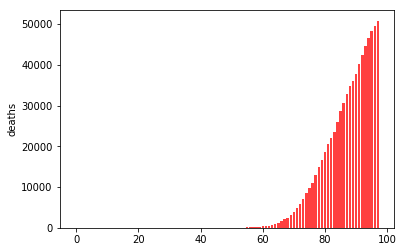

In [150]:
d1 = CD_stateDF_byDt['deaths']
x_axis = np.arange(len(d1))
plt.bar(x_axis, d1, color='r', alpha=0.75, align="center")
plt.ylabel('deaths')


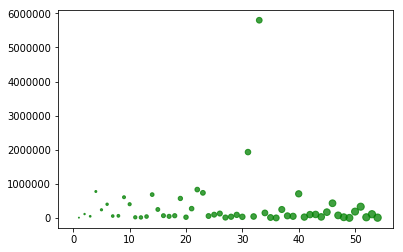

In [140]:
c2 = CD_stateDF_bySt['cases']
x_axis = np.arange(len(c2))

plt.scatter(x_axis, c2, marker="o", facecolors="green", edgecolors="green",
            s=x_axis, alpha=0.75)

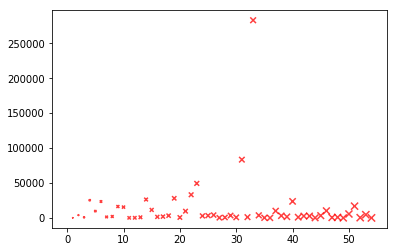

In [142]:
d2 = CD_stateDF_bySt['deaths']
x_axis = np.arange(len(d2))

plt.scatter(x_axis, d2, marker="x", facecolors="red", edgecolors="red",
            s=x_axis, alpha=0.75)

### Join Weather data sets: Daily Temperature (inTavg) and Station locations (inStation)  on ID

In [62]:
inTavgDF.head()

,date,element,id,value
0,20200101,TAVG,USS0018D08S,23
1,20200101,TAVG,MXM00076423,92
2,20200101,TAVG,CA003034485,0
3,20200101,TAVG,USS0006K44S,-62
4,20200101,TAVG,USS0010E12S,-43


In [71]:
inStationDF2 = inStationDF
inStationDF2.head()

,elev,id,lat,long,st
0,10.1,ACW00011604,17.1167,-61.7833,
1,19.2,ACW00011647,17.1333,-61.7833,
2,34,AE000041196,25.333,55.517,
3,10.4,AEM00041194,25.255,55.364,
4,26.8,AEM00041217,24.433,54.651,


In [68]:
inStNameDF.head()

,st,state
0,AB,ALBERTA
1,AK,ALASKA
2,AL,ALABAMA
3,AR,ARKANSAS
4,AS,AMERICAN


In [75]:
inStationDF2 = pd.merge(inStationDF2, inStNameDF, how='inner', on=['st','st'] )
inStationDF2.head()

,elev,id,lat,long,st,state_x,state_y
0,408.4,AQC00914000,-14.3167,-170.7667,AS,AMERICAN,AMERICAN
1,182.9,AQC00914005,-14.2667,-170.65,AS,AMERICAN,AMERICAN
2,6.1,AQC00914021,-14.2667,-170.5833,AS,AMERICAN,AMERICAN
3,80.8,AQC00914060,-14.2667,-170.6833,AS,AMERICAN,AMERICAN
4,249.9,AQC00914135,-14.3,-170.7,AS,AMERICAN,AMERICAN


In [76]:
dlyTemps = pd.merge (inTavgDF, inStationDF2, how='inner', on=['id','id'])
dlyTemps.head()

,date,element,id,value,elev,lat,long,st,state_x,state_y
0,20200101,TAVG,USS0018D08S,23,1472.2,45.19,-118.55,OR,OREGON,OREGON
1,20200102,TAVG,USS0018D08S,-2,1472.2,45.19,-118.55,OR,OREGON,OREGON
2,20200103,TAVG,USS0018D08S,36,1472.2,45.19,-118.55,OR,OREGON,OREGON
3,20200104,TAVG,USS0018D08S,9,1472.2,45.19,-118.55,OR,OREGON,OREGON
4,20200105,TAVG,USS0018D08S,-13,1472.2,45.19,-118.55,OR,OREGON,OREGON


In [83]:
dlyTemps_bySt_byDt = dlyTemps.groupby(['st','date'], as_index=False)
dlyTemps_bySt_byDt = dlyTemps_bySt_byDt.agg({'value':'mean','lat':'min','long':'min'})
dlyTemps_bySt_byDt.head()

,st,date,value,lat,long
0,AB,20200101,-35.536082,49,-110.0667
1,AB,20200102,-51.772727,49,-110.0667
2,AB,20200103,-66.238579,49,-110.0667
3,AB,20200104,-30.497462,49,-110.0667
4,AB,20200105,-64.710660,49,-110.0667


In [146]:
dlyTemps_byDt = dlyTemps.groupby(['date'], as_index=False)
dlyTemps_byDt = dlyTemps_byDt.agg({'value':'mean','lat':'min','long':'min'})
dlyTemps_byDt.head()

,date,value,lat,long
0,20200101,-11.003827,13.4836,-100.05
1,20200102,-13.456728,-14.3306,-100.05
2,20200103,-4.284001,-14.3306,-100.05
3,20200104,-10.640013,-14.3306,-100.05
4,20200105,-30.314440,-14.3306,-100.05


<BarContainer object of 150 artists>

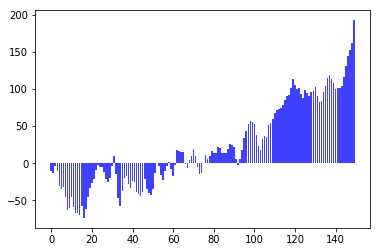

In [147]:
t1 = dlyTemps_byDt['value']
x_axis = np.arange(len(t1))
plt.bar(x_axis, t1, color='b', alpha=0.75, align="center")